In [2]:
## libraby

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Obtenir le site Web et extraire les données**

webpage = requests.get("...") : télécharge la page web à l’URL donnée et stocke la réponse HTTP (son contenu, son code de statut, etc.) dans la variable webpage.

soup = BeautifulSoup(webpage.content, "html.parser") : transforme le HTML brut de webpage en un objet BeautifulSoup pour pouvoir parcourir et extraire facilement des éléments de la page.

In [3]:

webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")


soup = BeautifulSoup(webpage.content, "html.parser")

Ici, nous utilisons la fonction **.find_all** sur la soup  variable que nous avons déclarée auparavant, cette soup  variable a le contenu du site Web, nous devons donc trouver ce dont nous avons besoin.


Dans le code, vous pouvez modifier "class"n'importe quelle balise HTML comme "id"et "class-name"n'importe quel nom de classe/id spécifique que vous souhaitez trouver.

In [5]:
#Stockez tout le texte en HTML avec la classe "Rating","CocoaPercent" et Company
rating_column = soup.find_all(attrs={"class": "Rating"})
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})
company_column=soup.find_all(attrs={"class": "Company"})
origin_column=soup.find_all(attrs={"class": "Origin"})



In [6]:
#
#rating_column

In [7]:
#type(rating_column)

In [8]:
origin_column[0].get_text().replace("\n","")


'Specific Bean Origin               or Bar Name            '

In [9]:
origin_column[0].get_text().replace("\n","")

'Specific Bean Origin               or Bar Name            '

In [11]:
#Faire des listes vides pour Rating et CocoaPercent
ratings = []
cocoa_percents = []
company=[]
origin=[]


#Boucle pour insérer chaque donnée de table dans la liste
for x in rating_column[1:]:
  ratings.append(float(x.get_text()))






for cm in company_column[1:]:
    company.append(cm.get_text())



for org in origin_column[1:]:
    origin.append(org.get_text())

for cacao in cocoa_percent_tags[1:]:
  cocoa_percents.append(cacao.get_text())

#Combiner les notes et la liste des pourcentages de cacao dans un dictionnaire
data = {"Company": company,"Origine spécifique du harirot":origin, "Rating": ratings, "CocoaPercentage": cocoa_percents}

#Créer une nouvelle trame de données à partir du dictionnaire de données
df = pd.DataFrame.from_dict(data)


In [12]:
df.head(10)

,Company,Origine spécifique du harirot,Rating,CocoaPercentage
0,A. Morin,Agua Grande,3.75,63%
1,A. Morin,Kpime,2.75,70%
2,A. Morin,Atsane,3.00,70%
3,A. Morin,Akata,3.50,70%
4,A. Morin,Quilla,3.50,70%
5,A. Morin,Carenero,2.75,70%
6,A. Morin,Cuba,3.50,70%
7,A. Morin,Sur del Lago,3.50,70%
8,A. Morin,Puerto Cabello,3.75,70%
9,A. Morin,Pablino,4.00,70%


In [13]:
df.shape

(1795, 4)

In [14]:
#df.to_csv('/content/export/GfG.csv', index = True)

# **Méthodes utiles de BeautifulSoup**

# **A. Rechercher des éléments**


| Méthode                          | Ce qu’elle fait                                                                        |
| -------------------------------- | -------------------------------------------------------------------------------------- |
| `find(name, attrs, string)`      | Retourne **le premier** élément qui correspond (par nom de balise, attributs, texte).  |
| `find_all(name, attrs, string)`  | Retourne **tous** les éléments correspondants (liste). Alias : `findAll`.              |
| `select(css_selector)`           | Retourne les éléments qui matchent un **sélecteur CSS** (ex. `"table.data td.price"`). |
| `select_one(css_selector)`       | Retourne **le premier** élément qui match un sélecteur CSS.                            |
| `find_parent(name, attrs)`       | Premier **parent** qui matche.                                                         |
| `find_parents(name, attrs)`      | **Tous les parents** qui matchent.                                                     |
| `find_next(name, attrs)`         | Prochain élément **après** dans le flux qui matche.                                    |
| `find_all_next(name, attrs)`     | **Tous** les suivants qui matchent.                                                    |
| `find_previous(name, attrs)`     | Élément **avant** dans le flux qui matche.                                             |
| `find_all_previous(name, attrs)` | **Tous** les précédents qui matchent.                                                  |


**B. Naviguer dans l’arbre**

| Méthode/Attribut                          | Ce qu’elle fait                                                |
| ----------------------------------------- | -------------------------------------------------------------- |
| `tag.parent` / `tag.parents`              | Accéder au parent / itérer sur tous les parents.               |
| `tag.next_sibling` / `previous_sibling`   | Frère **suivant** / **précédent** immédiat.                    |
| `tag.next_siblings` / `previous_siblings` | Itérateurs sur **tous** les frères suivants/précédents.        |
| `tag.children` / `tag.descendants`        | Itérateurs sur **enfants directs** / **tous les descendants**. |
| `tag.contents`                            | **Liste** des enfants directs.                                 |
| `soup.title`, `soup.head`, `soup.body`    | Accès rapide au **premier** tag de ce type.                    |


In [16]:
# mon DataFrame brut existe déjà
df = pd.DataFrame.from_dict(data)

# affichage rapide (optionnel)
df.head(10)
df.shape

# === Appel de mon package transformation_cacao ===
from transformation_cacao import transform_cacao

df_clean = transform_cacao(df)

# Vérifier ton DataFrame transformé
display(df_clean.head(10))
df_clean.info()


,Company,BeanOrigin,Rating,CocoaPercent,CocoaFraction
0,A. Morin,Agua Grande,3.75,63.0,0.63
1,A. Morin,Kpime,2.75,70.0,0.7
2,A. Morin,Atsane,3.00,70.0,0.7
3,A. Morin,Akata,3.50,70.0,0.7
4,A. Morin,Quilla,3.50,70.0,0.7
5,A. Morin,Carenero,2.75,70.0,0.7
6,A. Morin,Cuba,3.50,70.0,0.7
7,A. Morin,Sur del Lago,3.50,70.0,0.7
8,A. Morin,Puerto Cabello,3.75,70.0,0.7
9,A. Morin,Pablino,4.00,70.0,0.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company        1795 non-null   category
 1   BeanOrigin     1795 non-null   category
 2   Rating         1795 non-null   float64 
 3   CocoaPercent   1795 non-null   Float64 
 4   CocoaFraction  1795 non-null   Float64 
dtypes: Float64(2), category(2), float64(1)
memory usage: 112.5 KB


,Company,BeanOrigin,Rating,CocoaPercent,CocoaFraction
0,A. Morin,Agua Grande,3.75,63.0,0.63
1,A. Morin,Kpime,2.75,70.0,0.7
2,A. Morin,Atsane,3.00,70.0,0.7
3,A. Morin,Akata,3.50,70.0,0.7
4,A. Morin,Quilla,3.50,70.0,0.7


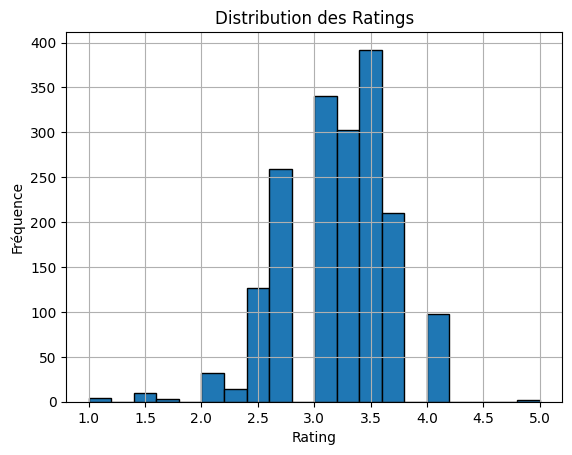

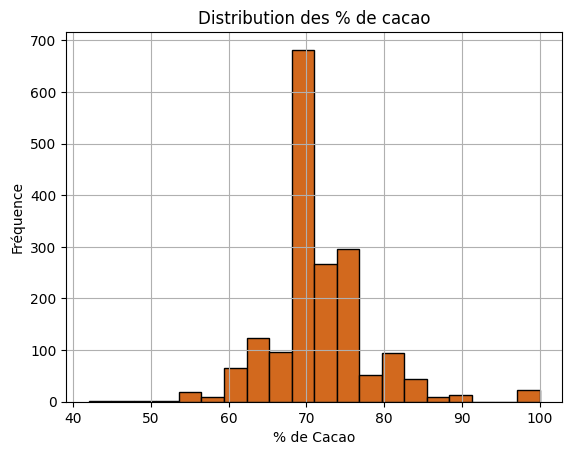

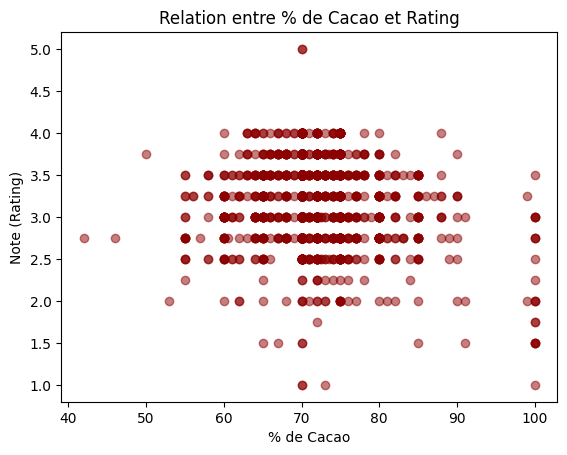

In [ ]:
# ========================
#  Pipeline Automatisé
# ========================
import requests
from bs4 import BeautifulSoup
import pandas as pd
from transformation_cacao import transform_cacao
import matplotlib.pyplot as plt

def run_pipeline(url: str = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"):
    """
    Télécharge les données du site, les transforme avec transformation_cacao
    et retourne un DataFrame propre.
    """
    # Extraction
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    ratings = [float(x.get_text()) for x in soup.find_all(attrs={"class": "Rating"})[1:]]
    cocoa_percents = [c.get_text() for c in soup.find_all(attrs={"class": "CocoaPercent"})[1:]]
    company = [c.get_text() for c in soup.find_all(attrs={"class": "Company"})[1:]]
    origin = [o.get_text() for o in soup.find_all(attrs={"class": "Origin"})[1:]]

    data = {
        "Company": company,
        "Origine spécifique du harirot": origin,
        "Rating": ratings,
        "CocoaPercentage": cocoa_percents,
    }
    df = pd.DataFrame.from_dict(data)

    # Transformation
    return transform_cacao(df)


# ========================
# 📊 Visualisations 
# ========================
def plot_analysis(df):
    """Affiche quelques visualisations basiques du dataset cacao nettoyé."""
    # Histogramme des ratings
    df["Rating"].hist(bins=20, edgecolor="black")
    plt.title("Distribution des Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Fréquence")
    plt.show()

    # Histogramme du % cacao
    df["CocoaPercent"].hist(bins=20, edgecolor="black", color="chocolate")
    plt.title("Distribution des % de cacao")
    plt.xlabel("% de Cacao")
    plt.ylabel("Fréquence")
    plt.show()

    # Scatter plot % cacao vs Rating
    plt.scatter(df["CocoaPercent"], df["Rating"], alpha=0.5, color="darkred")
    plt.title("Relation entre % de Cacao et Rating")
    plt.xlabel("% de Cacao")
    plt.ylabel("Note (Rating)")
    plt.show()


# ========================
#  Utilisation
# ========================
df_clean_auto = run_pipeline()
display(df_clean_auto.head())

plot_analysis(df_clean_auto)


In [19]:
# Export du DataFrame nettoyé en CSV
df_clean_auto.to_csv("cacao_clean.csv", index=False, encoding="utf-8")
print("✅ Données exportées dans cacao_clean.csv")


✅ Données exportées dans cacao_clean.csv
